In [1]:
%matplotlib inline
import os
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
aisles_df=pd.read_csv('aisles.csv')
departments_df =pd.read_csv('departments.csv')
orders_df =pd.read_csv('orders.csv')
products_df =pd.read_csv('products.csv')
orders_products_prior_df =pd.read_csv('order_products__prior.csv')
orders_products_train_df=pd.read_csv('order_products__train.csv')

In [4]:
order_products_total_df = pd.concat([orders_products_prior_df, orders_products_train_df])

In [5]:
order_products_total_df = pd.merge(order_products_total_df, products_df, on='product_id')

In [6]:
reordered_df = pd.DataFrame([['Reordered', 1], ['Not-Reordered', 0]], columns = ['is_reordred','reordered'])
order_products_total_df = pd.merge(order_products_total_df, reordered_df, on='reordered')
order_products_total_df.groupby('is_reordred').size().reset_index().rename(columns={0:'Number Of products'})

,is_reordred,Number Of products
0,Not-Reordered,13863746
1,Reordered,19955360


In [7]:
products_order_freq = order_products_total_df.groupby(['product_name','department_id', 'aisle_id']).size().reset_index().rename(columns={0:'order_count'})
products_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)

In [8]:
#Top most ordered products are produce
products_order_freq.head(10)

,product_name,department_id,aisle_id,order_count
3677,Banana,4,24,491291
3472,Bag of Organic Bananas,4,24,394930
31923,Organic Strawberries,4,24,275577
28843,Organic Baby Spinach,4,123,251705
30300,Organic Hass Avocado,4,24,220877
28807,Organic Avocado,4,24,184224
22415,Large Lemon,4,24,160792
42908,Strawberries,4,24,149445
23422,Limes,4,24,146660
32481,Organic Whole Milk,16,84,142813


Looks like the most ordered products are fruits and vegetables. let's merge the department and aisle dataframes to have a better picture

In [9]:
order_products_total_df = pd.merge(order_products_total_df, aisles_df, on='aisle_id')
order_products_total_df = pd.merge(order_products_total_df, departments_df, on='department_id')

In [10]:
products_order_freq.head(10)

,product_name,department_id,aisle_id,order_count
3677,Banana,4,24,491291
3472,Bag of Organic Bananas,4,24,394930
31923,Organic Strawberries,4,24,275577
28843,Organic Baby Spinach,4,123,251705
30300,Organic Hass Avocado,4,24,220877
28807,Organic Avocado,4,24,184224
22415,Large Lemon,4,24,160792
42908,Strawberries,4,24,149445
23422,Limes,4,24,146660
32481,Organic Whole Milk,16,84,142813


In [11]:
order_products_total_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_reordred,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs
1,327,33120,5,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs
2,390,33120,28,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs
3,537,33120,2,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs
4,582,33120,7,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs
5,608,33120,5,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs
6,623,33120,1,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs
7,689,33120,4,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs
8,726,33120,3,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs
9,771,33120,29,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs


In [12]:
department_order_freq = order_products_total_df.groupby(['department','is_reordred']).size().reset_index().rename(columns={0:'order_count'})
aisle_order_freq = order_products_total_df.groupby(['aisle','is_reordred']).size().reset_index().rename(columns={0:'order_count'})
department_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)

In [13]:
department_order_freq.head(5)

,department,is_reordred,order_count
39,produce,Reordered,6432596
15,dairy eggs,Reordered,3773723
38,produce,Not-Reordered,3455782
14,dairy eggs,Not-Reordered,1857344
7,beverages,Reordered,1832952


In [14]:
aisle_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)
aisle_order_freq.head(5)

,aisle,is_reordred,order_count
101,fresh fruits,Reordered,2726251
107,fresh vegetables,Reordered,2123540
106,fresh vegetables,Not-Reordered,1445090
197,packaged vegetables fruits,Reordered,1178700
100,fresh fruits,Not-Reordered,1066410


In [15]:
order_products_total_df = pd.merge(order_products_total_df, orders_df, on='order_id')
order_products_total_df.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,is_reordred,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,Reordered,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,Reordered,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,17794,6,1,Carrots,83,4,Reordered,fresh vegetables,produce,202279,prior,3,5,9,8.0
3,2,43668,9,0,Classic Blend Cole Slaw,123,4,Not-Reordered,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0
4,2,9327,3,0,Garlic Powder,104,13,Not-Reordered,spices seasonings,pantry,202279,prior,3,5,9,8.0


In [16]:
col_y = ['user_id_y', 'eval_set_y', 'order_number_y', 'order_dow_y', 'order_hour_of_day_y', 'days_since_prior_order_y' , 'DOW_name_y']
order_products_total_df = order_products_total_df.drop(col_y, axis =1)

KeyError: "['user_id_y' 'eval_set_y' 'order_number_y' 'order_dow_y'\n 'order_hour_of_day_y' 'days_since_prior_order_y' 'DOW_name_y'] not found in axis"

In [18]:
order_hour_traffic = order_products_total_df.groupby(['department','order_hour_of_day']).size().reset_index().rename(columns={0:'order_count'})

Text(0, 0.5, 'Order Count')

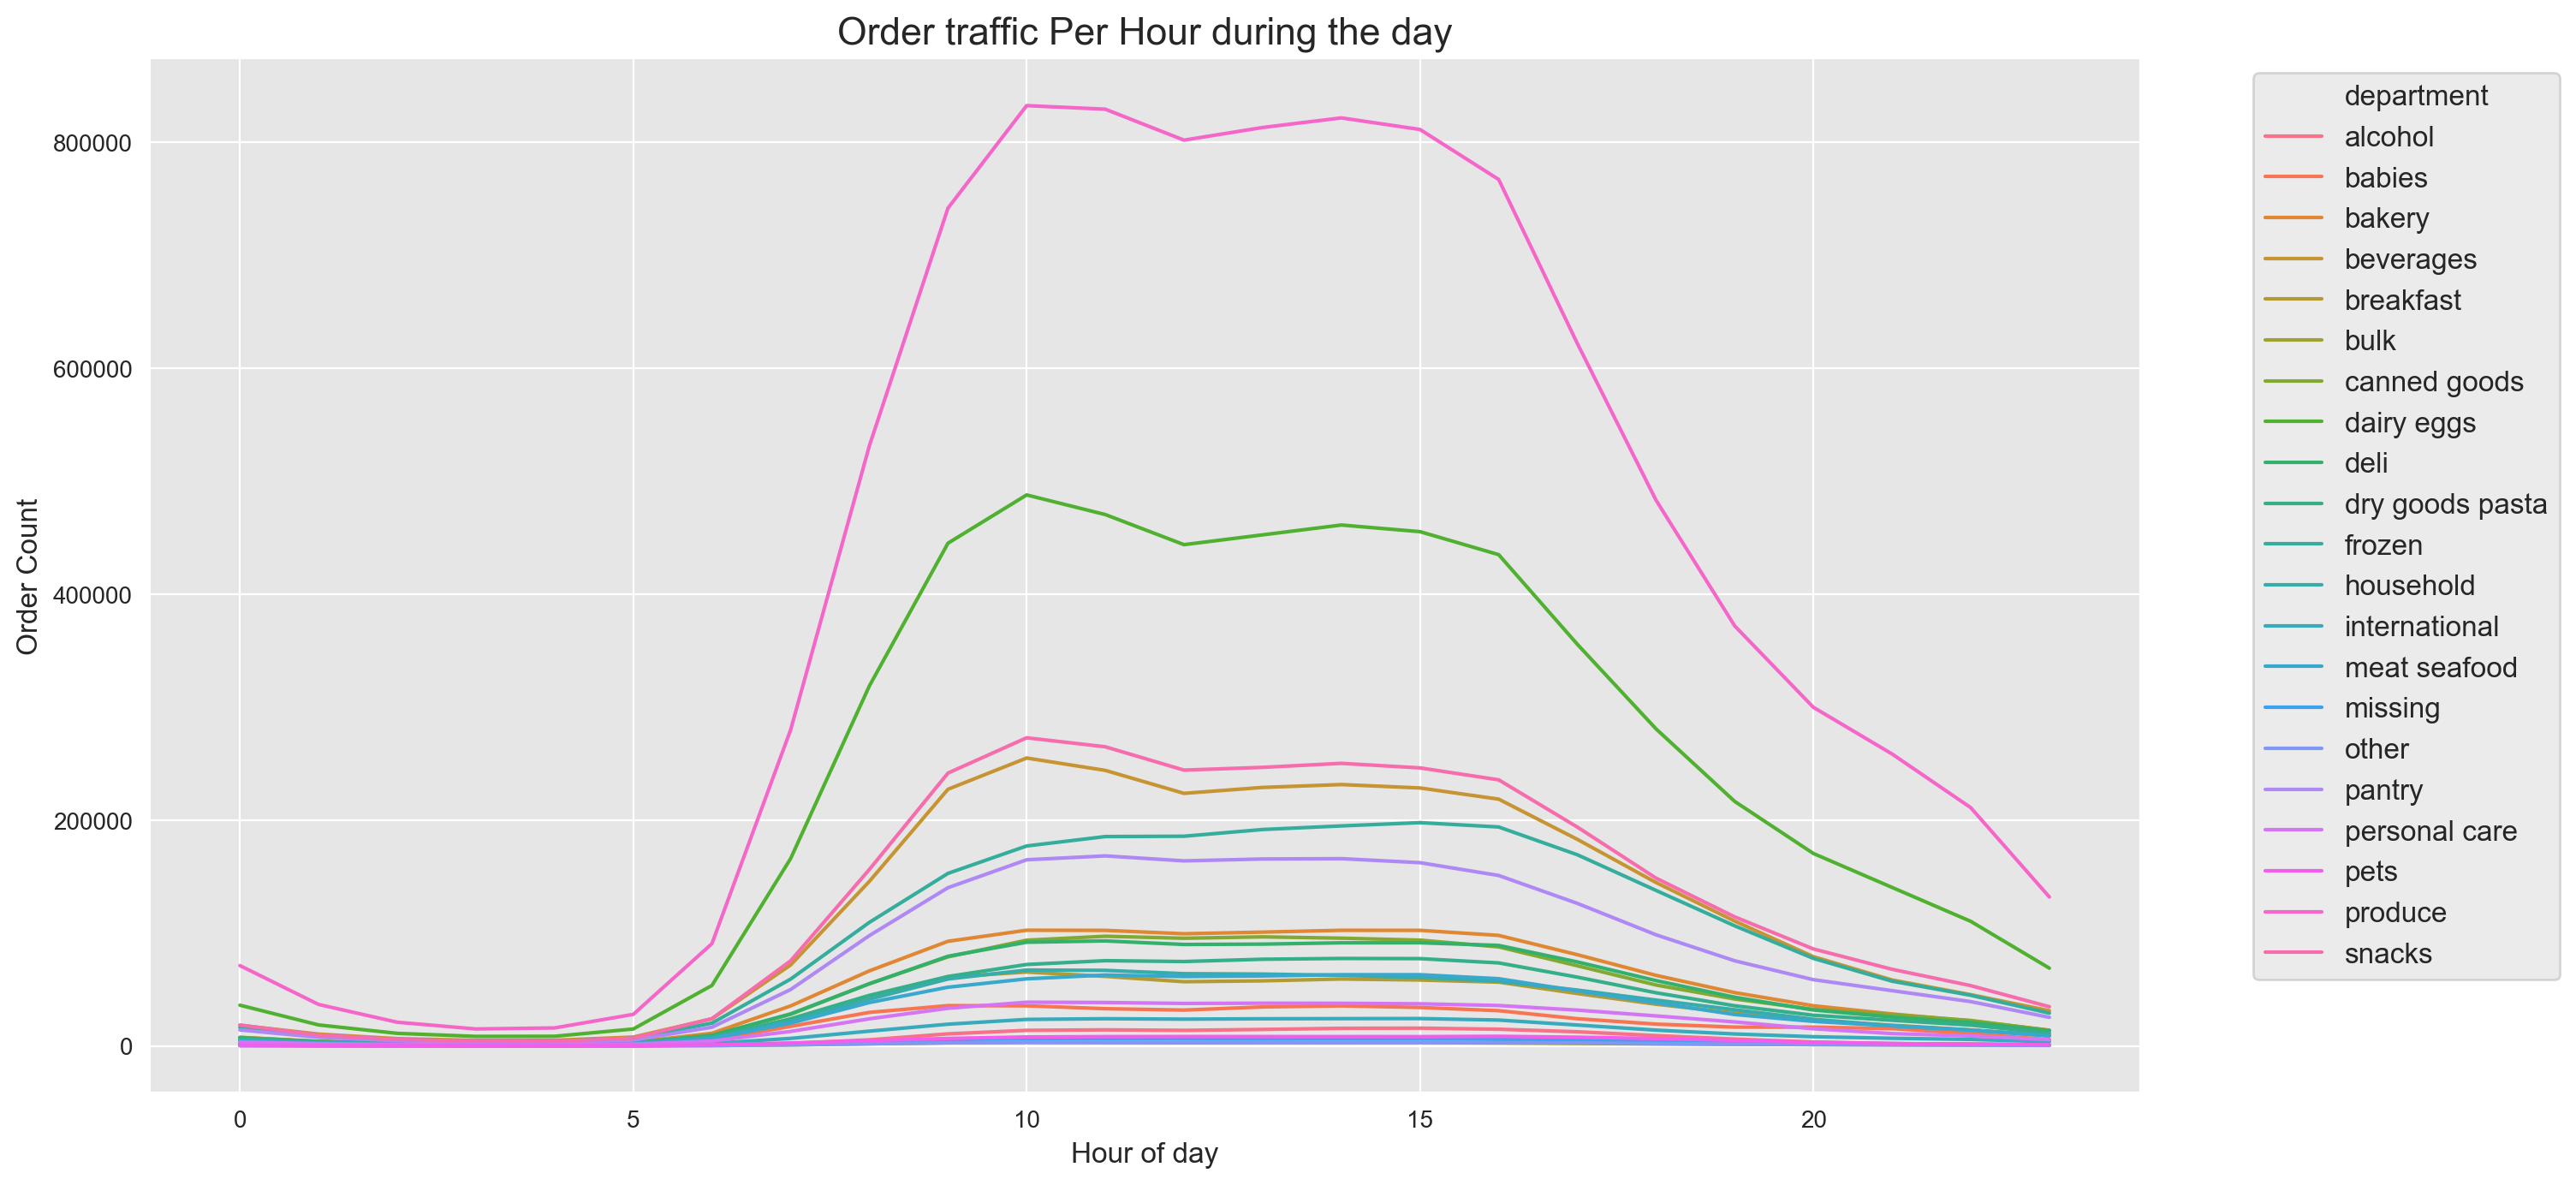

In [19]:
# create plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(15, 8), dpi=200)

# plot data
sns.lineplot(x='order_hour_of_day', y='order_count',  
             hue='department', linewidth=1.5, data=order_hour_traffic)

# set legend outside the plot             
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=12)
plt.title('Order traffic Per Hour during the day', fontsize=16)
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Order Count', fontsize=12)